In [1]:
import pandas as pd
import statsmodels.api as sm
file=pd.read_csv("C:/Users/deepika sakthivel/Downloads/Social_Network_Ads.csv")
df=pd.DataFrame(file)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
df.shape

(400, 5)

In [4]:
x=df.drop(['Purchased'],axis=1)
y=df["Purchased"]

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Gender"]=le.fit_transform(df['Gender'])

In [6]:
x=df.drop(['Purchased'],axis=1)
y=df["Purchased"]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
y_pred=classifier.predict(x_test)
classifier.predict_proba(x_test)

array([[0.89, 0.11],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.96, 0.04],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.13, 0.87],
       [0.99, 0.01],
       [0.28, 0.72],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.59, 0.41],
       [0.95, 0.05],
       [0.38, 0.62],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.11, 0.89],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.11, 0.89],
       [0.61, 0.39],
       [0.14, 0.86],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.88, 0.12],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.64, 0.36],
       [0.67, 0.33],
       [0.92, 0.08],
       [0.21, 0.79],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.77, 0.23],
       [0.65, 0.35],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.02,

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9375

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[54,  4],
       [ 1, 21]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.93      0.96        58\n           1       0.84      0.95      0.89        22\n\n    accuracy                           0.94        80\n   macro avg       0.91      0.94      0.92        80\nweighted avg       0.94      0.94      0.94        80\n'

In [19]:
help (RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [20]:
from sklearn.metrics import roc_curve

In [22]:
from sklearn.metrics import roc_auc_score

In [34]:
#visualizing the ROC-AUC-CURVE

y_proba=classifier.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.11 0.03 0.06 0.04 0.01 0.   0.   0.87 0.01 0.72 0.   0.01 0.   0.41
 0.05 0.62 0.03 0.04 0.89 0.   0.01 0.89 0.39 0.86 0.01 0.95 0.12 0.
 0.   0.36 0.33 0.08 0.79 0.   0.01 0.   0.   0.08 0.01 0.95 0.23 0.35
 0.06 0.03 0.8  0.   0.01 0.98 0.   0.8  0.97 0.03 0.36 0.93 0.86 1.
 0.03 0.13 0.93 0.   0.06 0.86 0.04 0.93 0.02 0.84 0.59 0.   0.22 0.44
 0.96 0.05 0.01 0.87 0.4  0.02 0.4  0.2  0.99 0.52]


In [35]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)  #using roc_curve() to generate fpr& tpr values

In [36]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first moel",roc_auc)

Area under the curve for first moel 0.9721786833855799


In [37]:
#plotting the roc curve
import matplotlib.pyplot as plt

Text(0, 0.5, 'True Positive Rate(Sensitivity)')

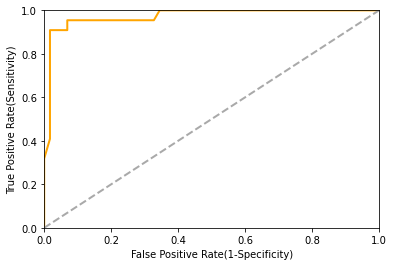

In [43]:
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')